In [1]:
#Classification problem - predict whether a mushroom is edible or not
#Understanding the data:

"""
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
"""

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
import sklearn

In [2]:
#Load the data
df_main = pd.read_csv('/Users/ojasbardiya/Downloads/datasets_478_974_mushrooms.csv')
df_main.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#get the dimensions
df_main.shape

(8124, 23)

In [4]:
#get the column names
df_main.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
#check
df_main.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
#Some basic data points
df_main.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


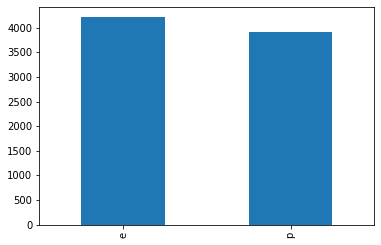

In [7]:
df_main['class'].value_counts().plot(kind='bar')

In [8]:
#Create separate dataframes for edible/non-edible mushrooms
df_edible_mushrooms = df_main[df_main['class'] == 'e']
df_nonedible_mushrooms = df_main[df_main['class'] == 'p']

In [9]:
#check
print(df_edible_mushrooms.shape[0], df_nonedible_mushrooms.shape[0])

4208 3916


Text(0.5, 1.0, 'Distribution of odor for edible mushrooms')

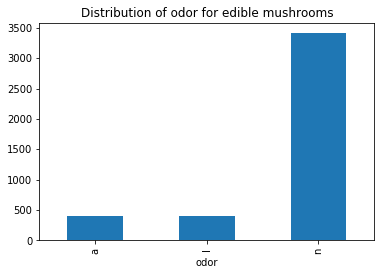

In [10]:
#Group according to Odor
df_edible_mushrooms.groupby('odor')['odor'].agg('count').plot(kind='bar')
plt.title('Distribution of odor for edible mushrooms')

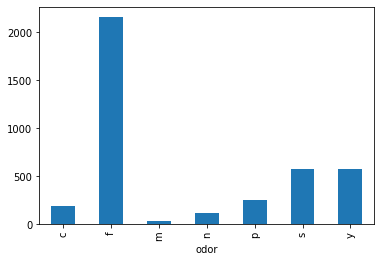

In [11]:
df_nonedible_mushrooms.groupby('odor')['odor'].agg('count').plot(kind='bar')

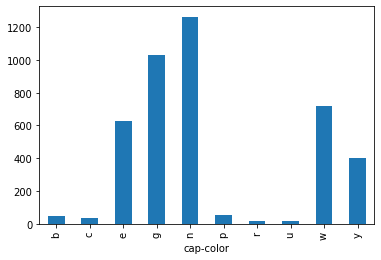

In [12]:
#Group according to Color
df_edible_mushrooms.groupby('cap-color')['cap-color'].agg('count').plot(kind='bar')

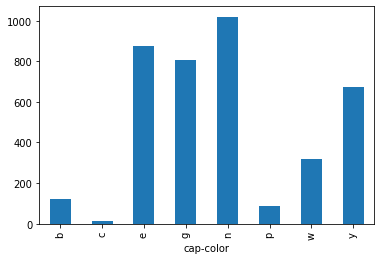

In [13]:
df_nonedible_mushrooms.groupby('cap-color')['cap-color'].agg('count').plot(kind='bar')

In [14]:
#Get the different types of populations for all mushrooms
m_populations = df_main['population'].value_counts(ascending=False)
m_populations

v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: population, dtype: int64

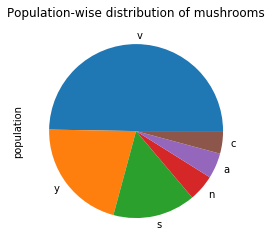

In [15]:
#display the count
m_populations.plot(kind='Pie', title='Population-wise distribution of mushrooms')

In [16]:
#Get the different types of populations for edible mushrooms
m_e_populations = df_edible_mushrooms['population'].value_counts(ascending=False)
m_e_populations

v    1192
y    1064
s     880
n     400
a     384
c     288
Name: population, dtype: int64

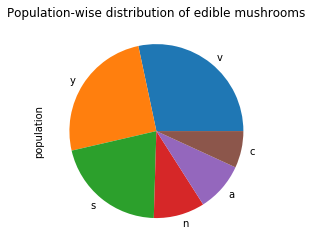

In [17]:
m_e_populations.plot(kind='Pie', title='Population-wise distribution of edible mushrooms')

In [18]:
#Get the different types of populations for non-edible mushrooms
m_ne_populations = df_nonedible_mushrooms['population'].value_counts(ascending=False)
m_ne_populations

v    2848
y     648
s     368
c      52
Name: population, dtype: int64

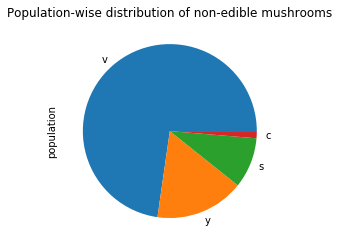

In [19]:
m_ne_populations.plot(kind='Pie', title='Population-wise distribution of non-edible mushrooms')

In [20]:
#Get the habitat distribution for all mushrooms
m_habitats = df_main['habitat'].value_counts(ascending=False)
m_habitats

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64

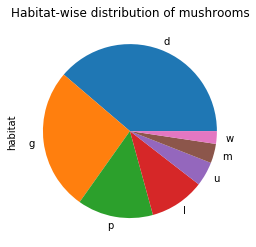

In [21]:
#display the count
m_habitats.plot(kind='Pie', title='Habitat-wise distribution of mushrooms')

In [22]:
#Get the habitat distribution for edible mushrooms
m_e_habitats = df_edible_mushrooms['habitat'].value_counts(ascending=False)
m_e_habitats

d    1880
g    1408
m     256
l     240
w     192
p     136
u      96
Name: habitat, dtype: int64

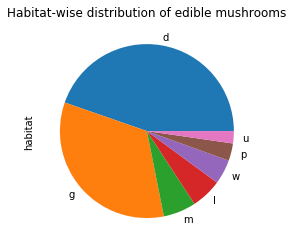

In [23]:
m_e_habitats.plot(kind='Pie', title='Habitat-wise distribution of edible mushrooms')

In [24]:
#Get the habitat distribution for non-edible mushrooms
m_ne_habitats = df_nonedible_mushrooms['habitat'].value_counts(ascending=False)
m_ne_habitats

d    1268
p    1008
g     740
l     592
u     272
m      36
Name: habitat, dtype: int64

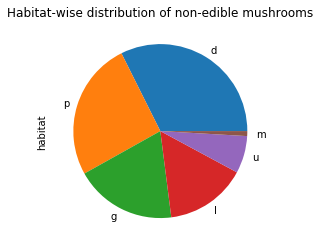

In [25]:
m_ne_habitats.plot(kind='Pie', title='Habitat-wise distribution of non-edible mushrooms')

In [26]:
#Create train and test data
X = df_main.drop('class', axis=1)
Y = df_main['class']

In [27]:
#check
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [28]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
encoder_func = LabelEncoder()
for i in X.columns:
    X[i] = encoder_func.fit_transform(X[i])

In [29]:
#check
X.head(10)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
5,5,3,9,1,0,1,0,0,5,0,...,2,7,7,0,2,1,4,2,2,1
6,0,2,8,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,2,3
7,0,3,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,3,3
8,5,3,8,1,6,1,0,1,7,0,...,2,7,7,0,2,1,4,2,4,1
9,0,2,9,1,0,1,0,0,2,0,...,2,7,7,0,2,1,4,2,3,3


In [30]:
#import the given model
from sklearn.linear_model import LogisticRegression

In [31]:
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [32]:
#apply the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/Users/ojasbardiya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
response_set = logreg.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, response_set))

0.9491386382280558


In [57]:
#Applying a Random forest model
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(max_features=9,max_depth=4,n_estimators=10)

In [58]:
rand_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rand_forest.score(X_train, Y_train)

0.9913823425958495

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(rand_forest,X_train,Y_train,cv=5)

array([0.99648506, 0.9876869 , 0.98592788, 0.9885664 , 0.99032542])

In [61]:
rand_forest.score(X_test, Y_test)

0.9905660377358491